In [2]:
# imports - processing, models, metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import f1_score, log_loss, accuracy_score

from scipy.stats import entropy
from scipy.stats import ttest_ind

In [3]:
# read in data
## mount google drive
from google.colab import drive
drive.mount('/content/drive')

## read in files and combine into 1 dataframe
states = ['CA', 'TX', 'AZ', 'CO', 'NY', 'KS', 'NC', 'GA', 'FL', 'OR', 'MT', 'AL']
Fires = pd.DataFrame()
for state in states:
  path = '/content/drive/MyDrive/DS 440/Final Report/Data/Big' + state + '.csv'
  df = pd.read_csv(path)
  Fires = Fires.append(df)

# remove fill value
Fires = Fires[Fires['aet']!=32768.].copy()

# create output feature
output_feature = 'SmallBig'
Fires['SmallBig'] = np.nan
small = ['A']
big = ['B','C','D','E','F','G']
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(small), 'SmallBig'] = 0
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(big), 'SmallBig'] = 1

Mounted at /content/drive


In [4]:
weather = ['aet','pet','soil','PDSI','def', 'ppt', 'q', 'tmax', 'tmin', \
           'vap', 'ws', 'vpd', 'srad', 'swe']

# Weather at national level

In [ ]:
for i in range(len(weather)):
  plt.figure()
  plt.hist(Fires[weather[i]])
  plt.title(weather[i])
  plt.show()

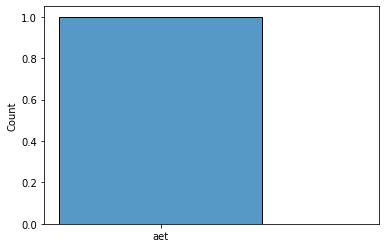

In [7]:
sns.histplot(weather[0])
#plt.title(weather[i])

In [17]:
len(weather)

14

In [ ]:
for i in range(0,len(weather),2):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4))
  sns.histplot(Fires[weather[i]], ax=ax1)
  sns.histplot(Fires[weather[i+1]],ax=ax2)
  #sns.histplot(Fires[weather[i+2]], ax=ax3)
  #sns.histplot(Fires[weather[i+3]],ax=ax4)
  plt.show()
  print()

#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
#sns.histplot(Fires[weather[12]], ax=ax1)
#sns.histplot(Fires[weather[13]], ax=ax2)
#plt.show()

In [37]:
# t test for each variable
Test = pd.DataFrame(columns=['var','difference','p-value'])

for i in range(len(weather)):
  # do a t test and store results
  #Test.append((weather[i],ttest_ind(Fires[Fires['SmallBig'] == 0.0][weather[i]], \
  #                                 Fires[Fires['SmallBig'] == 1.0][weather[i]])))
  result = ttest_ind(Fires[Fires['SmallBig'] == 0.0][weather[i]], \
                     Fires[Fires['SmallBig'] == 1.0][weather[i]])
  row = {'var':weather[i],'difference':result[0],'p-value':result[1]}
  row_df = pd.DataFrame([row],columns=row.keys())
  Test = pd.concat([Test,row_df])
  
Test.set_index('var')

,difference,p-value
var,,
aet,-67.145655,0.000000e+00
pet,46.583745,0.000000e+00
soil,-56.323680,0.000000e+00
PDSI,39.063557,0.000000e+00
def,82.002859,0.000000e+00
ppt,-86.783012,0.000000e+00
q,-44.432286,0.000000e+00
tmax,11.376595,5.615380e-30
tmin,-28.821194,3.386394e-182


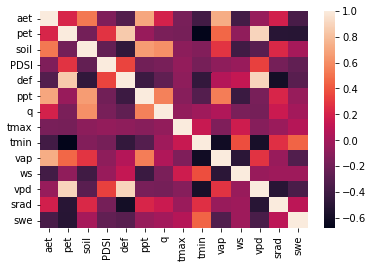

In [ ]:
sns.heatmap(Fires[weather].corr())

In [ ]:
np.corrcoef(Fires['def'],Fires['pet'])

array([[1.        , 0.85369584],
       [0.85369584, 1.        ]])

# Weather at state level

In [ ]:
states = list(Fires['STATE'].unique())

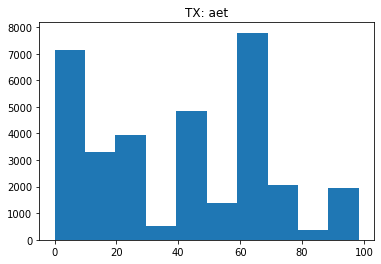

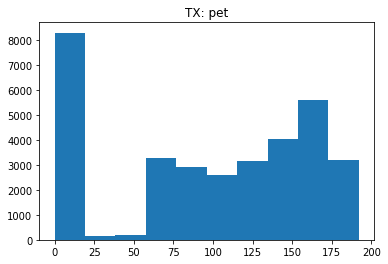

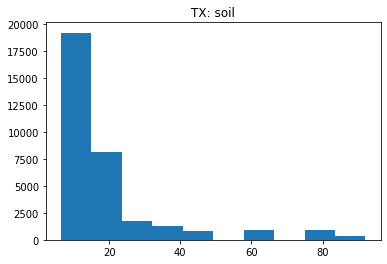

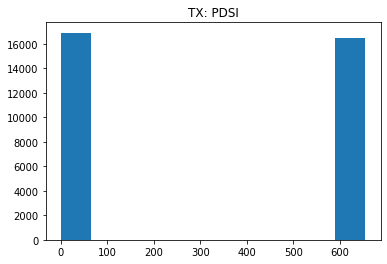

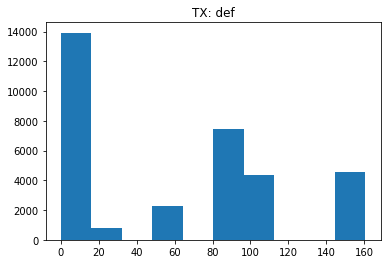

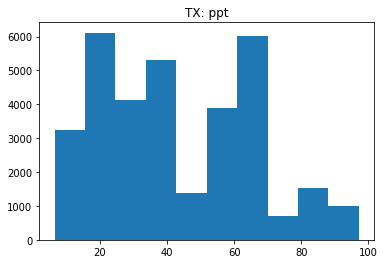

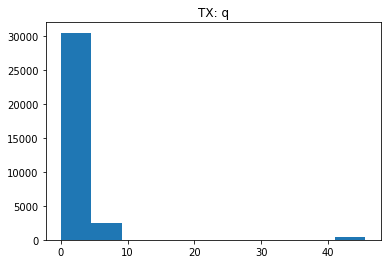

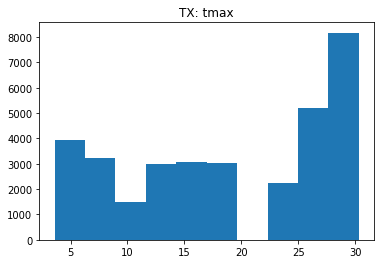

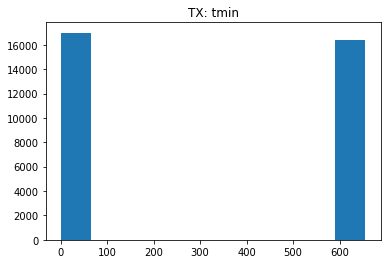

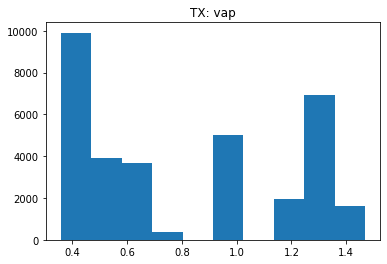

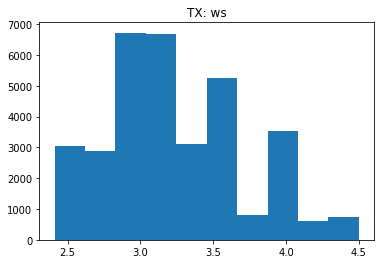

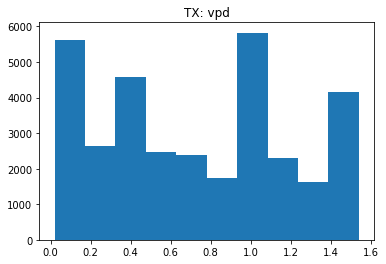

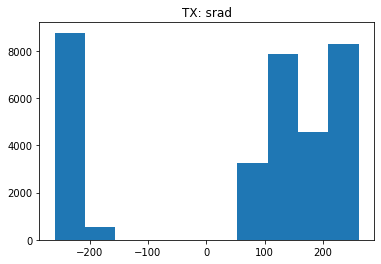

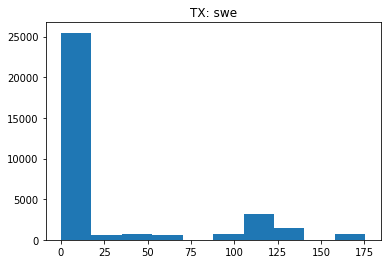

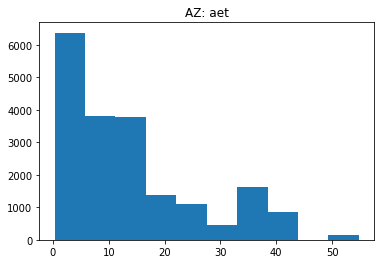

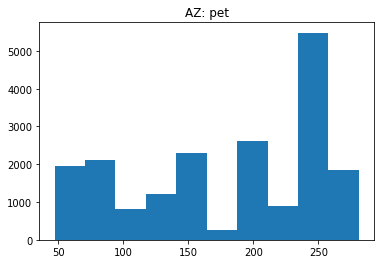

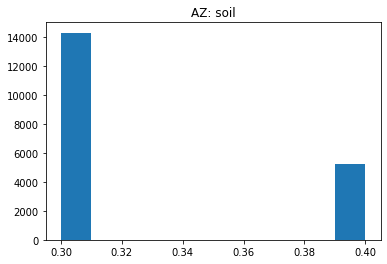

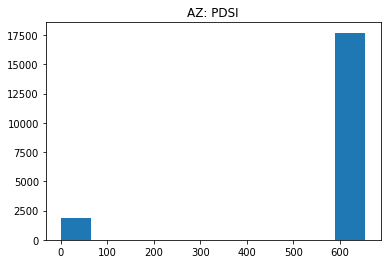

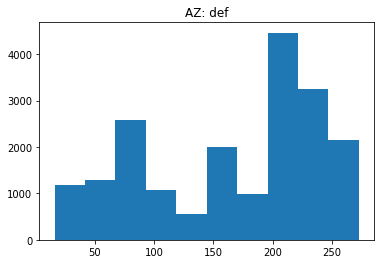

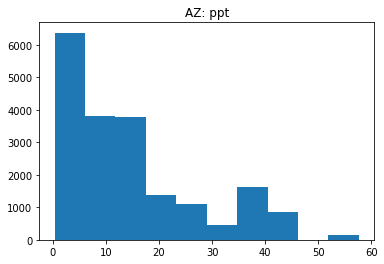

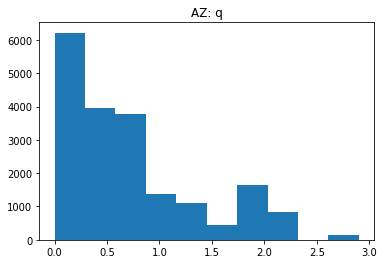

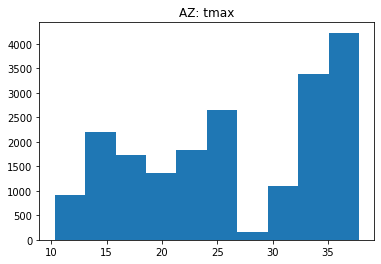

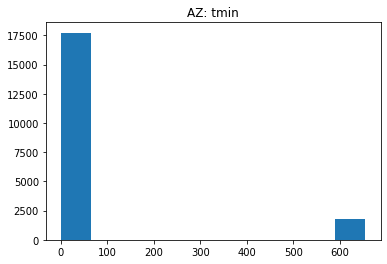

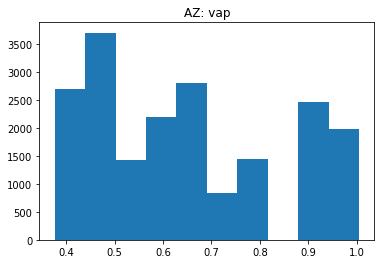

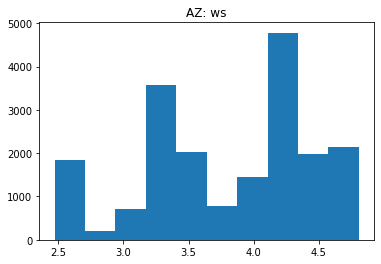

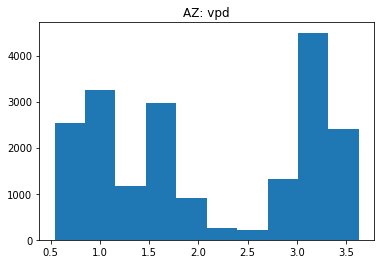

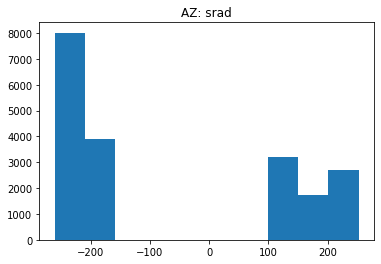

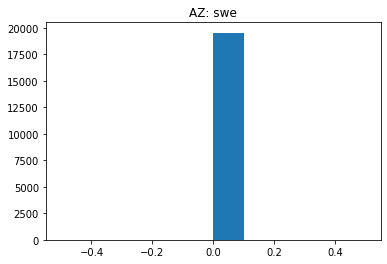

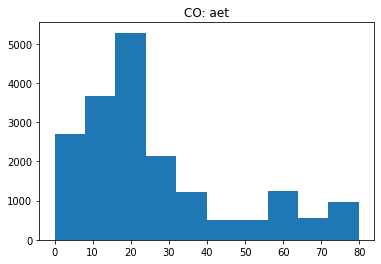

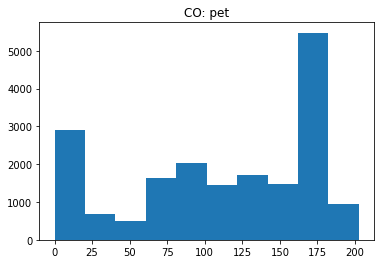

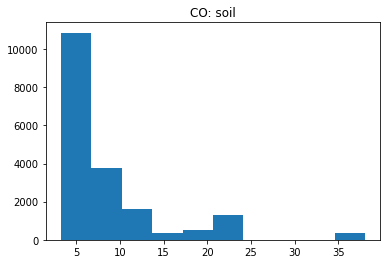

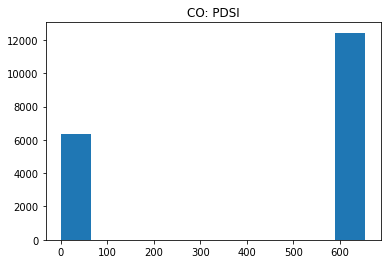

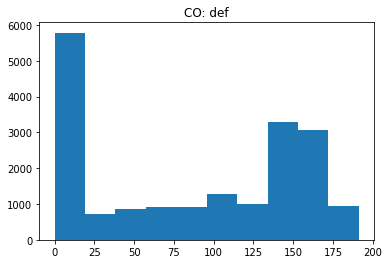

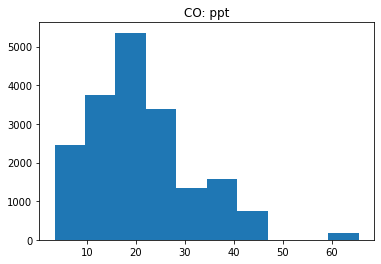

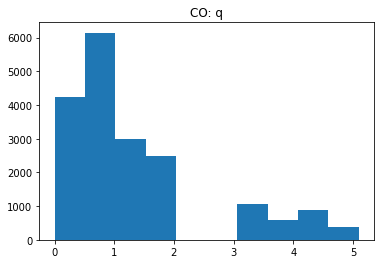

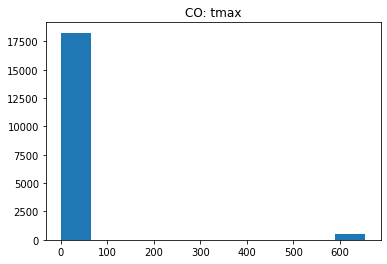

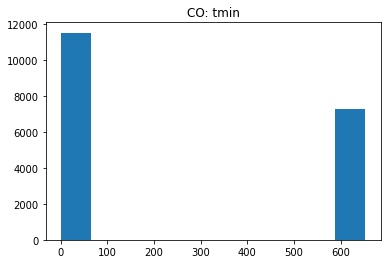

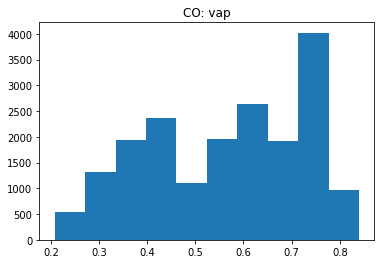

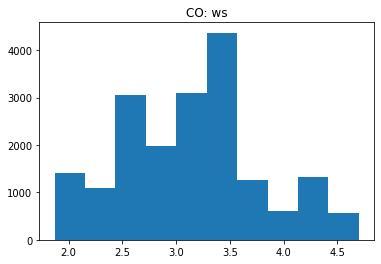

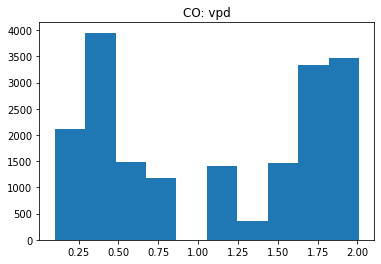

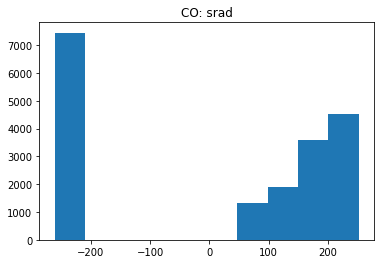

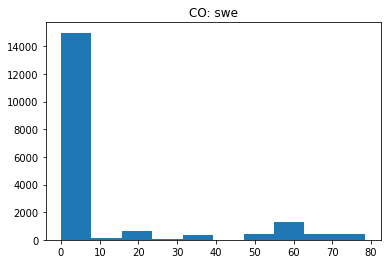

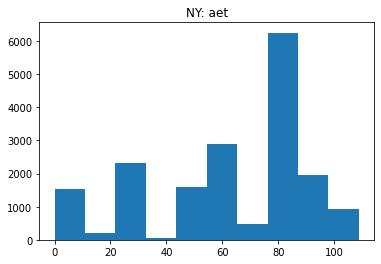

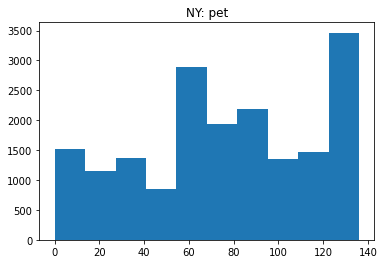

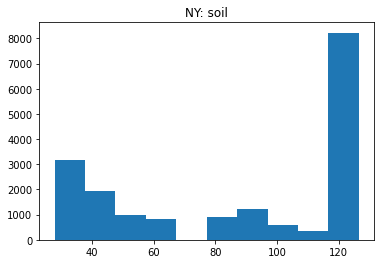

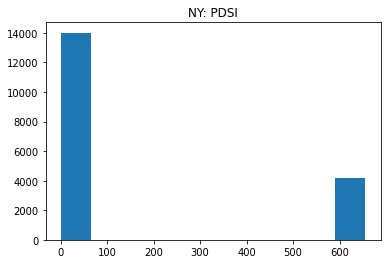

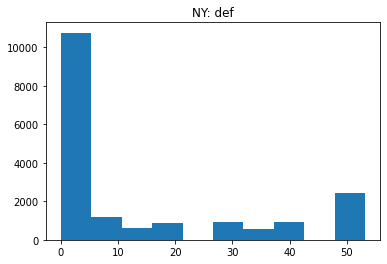

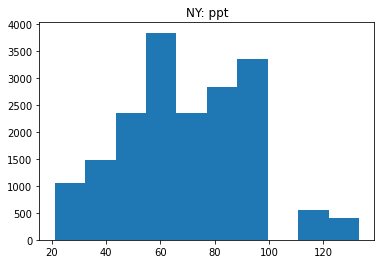

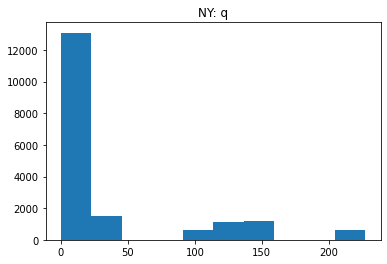

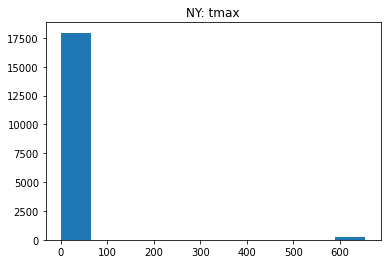

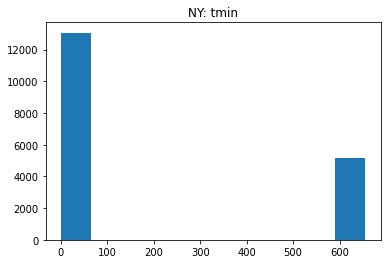

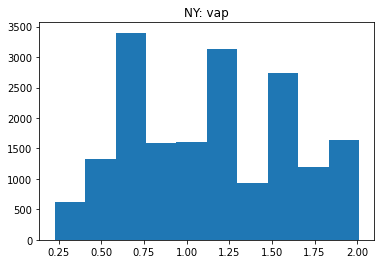

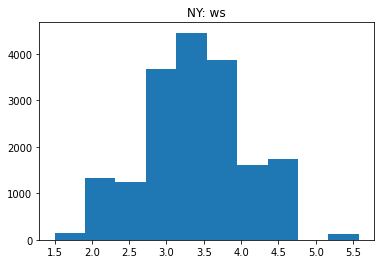

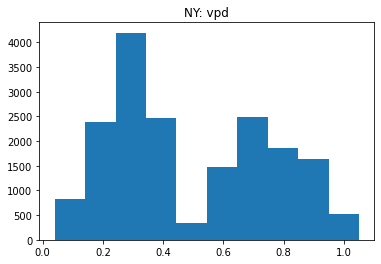

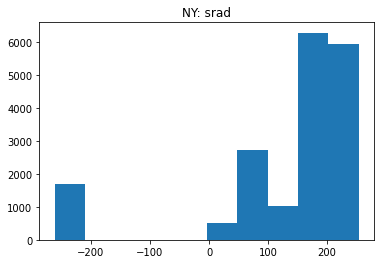

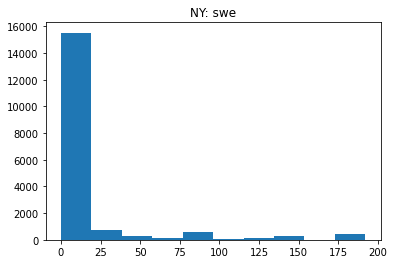

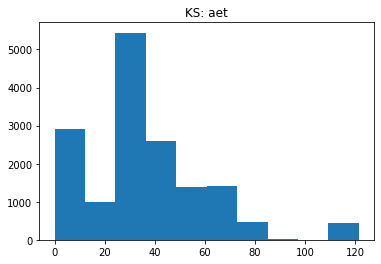

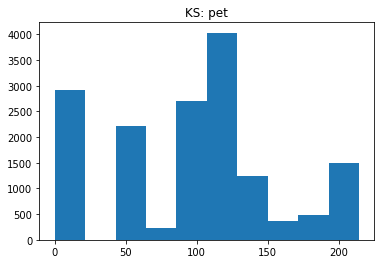

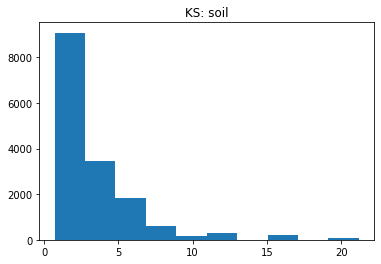

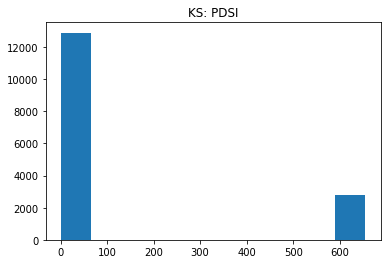

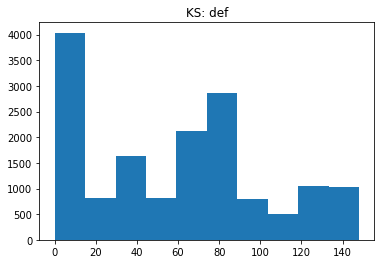

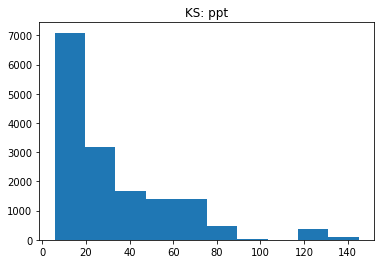

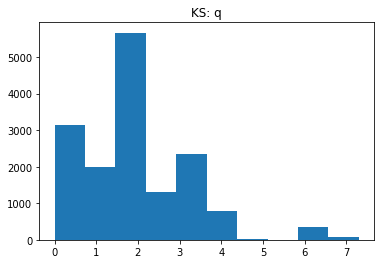

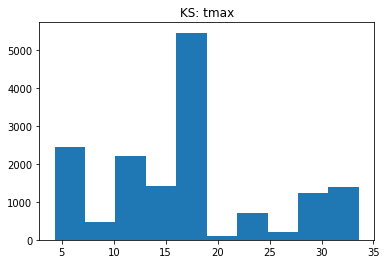

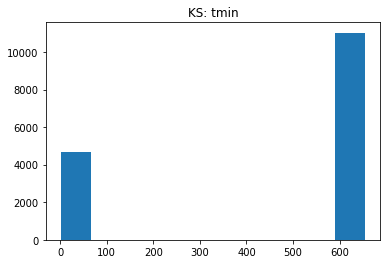

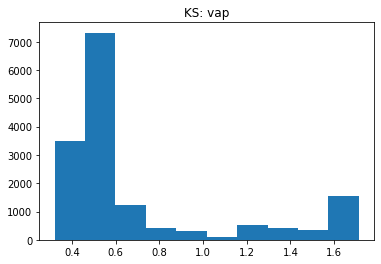

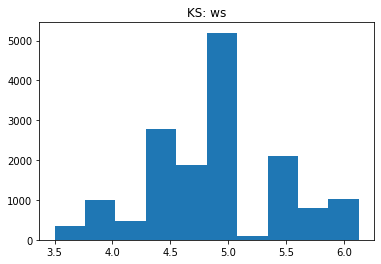

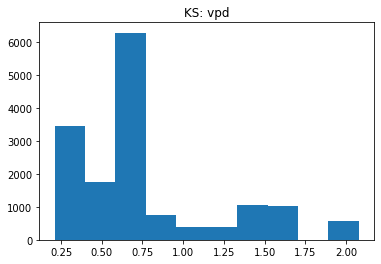

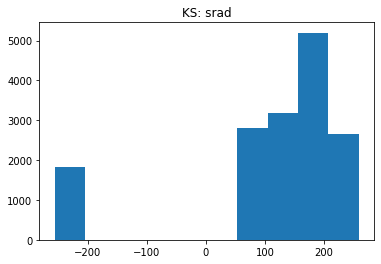

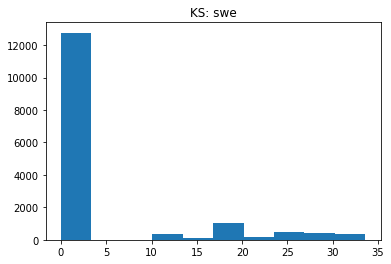

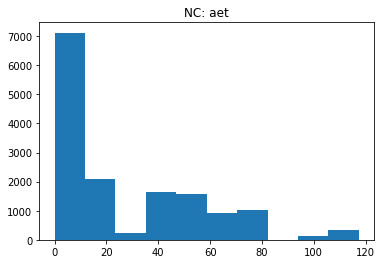

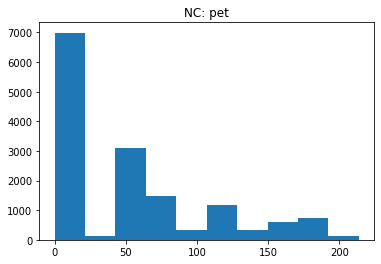

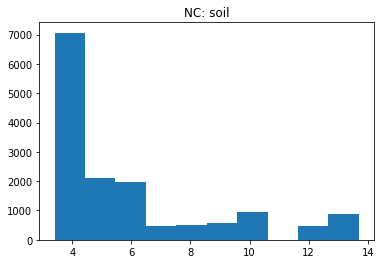

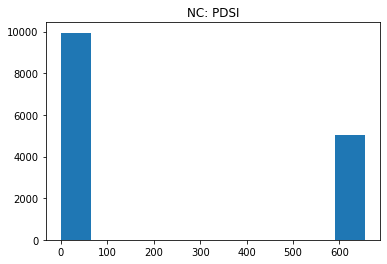

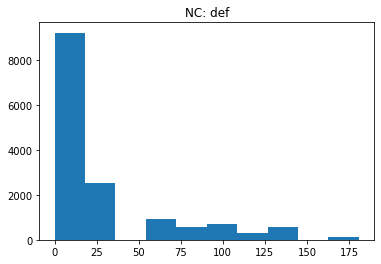

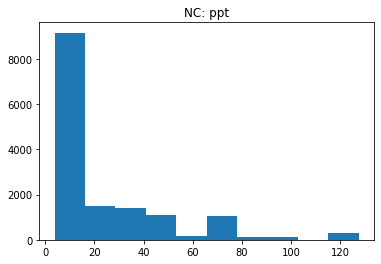

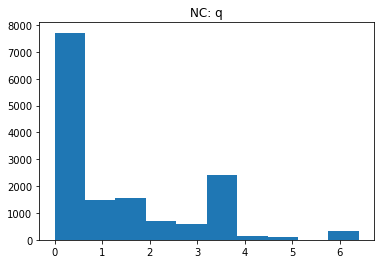

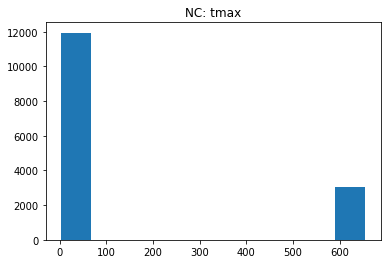

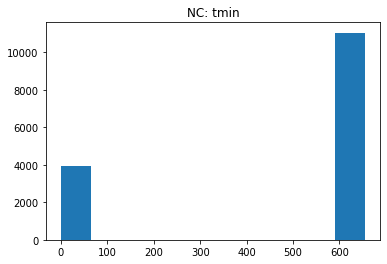

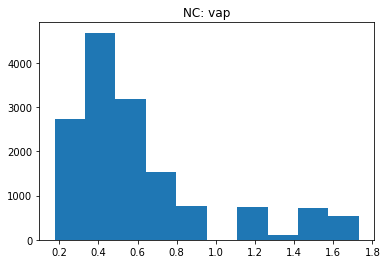

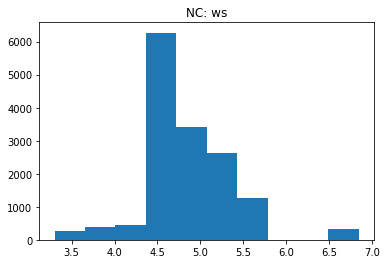

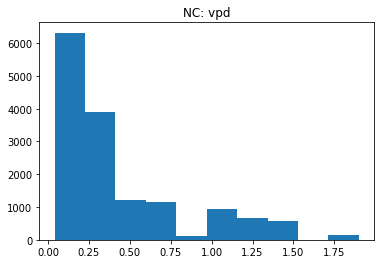

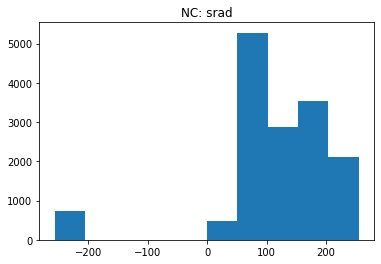

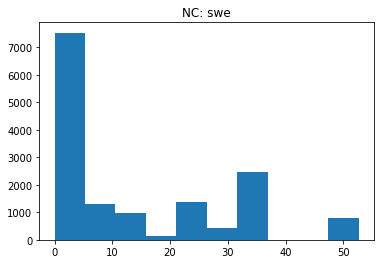

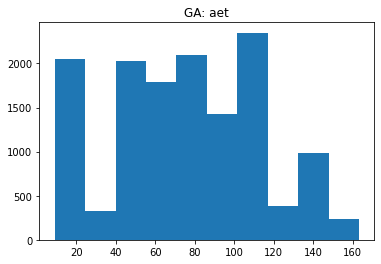

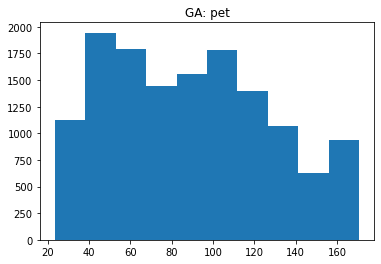

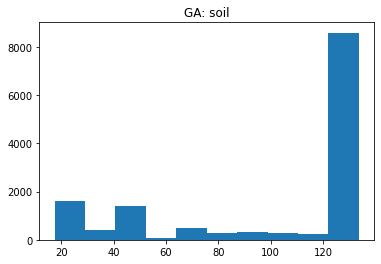

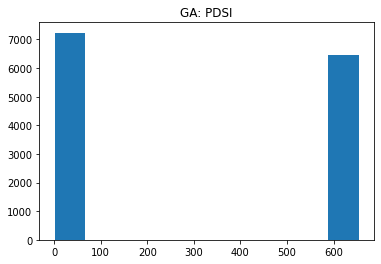

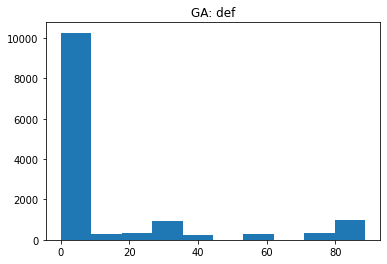

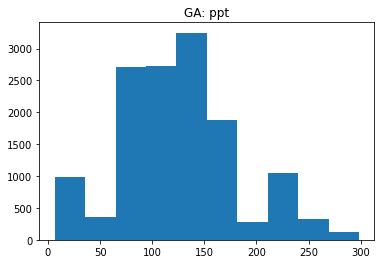

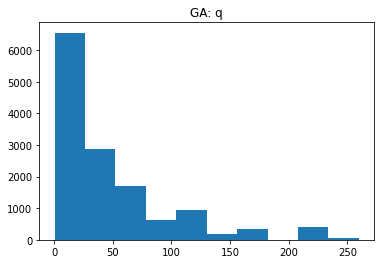

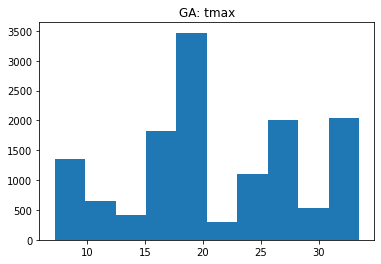

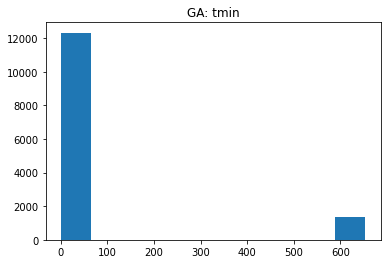

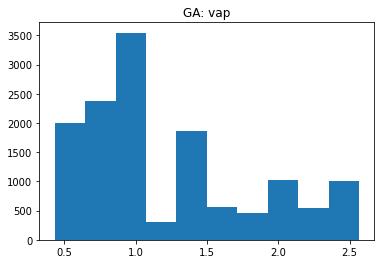

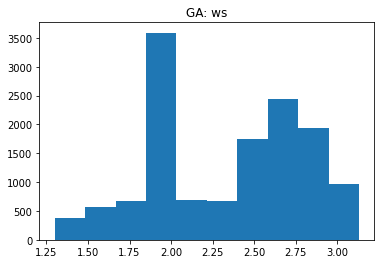

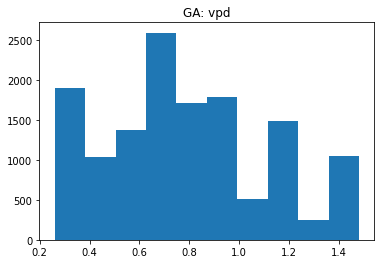

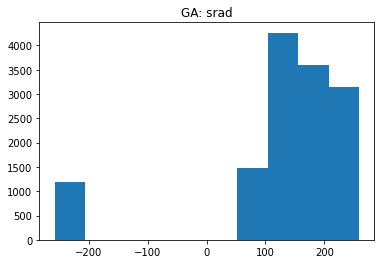

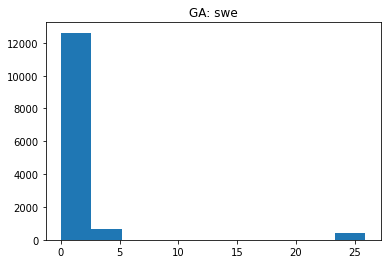

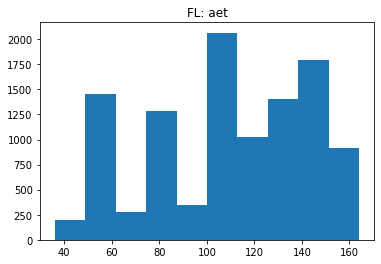

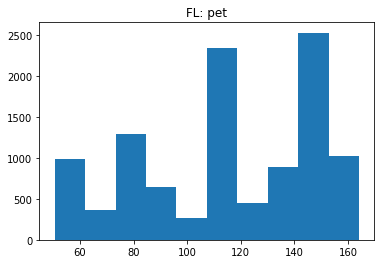

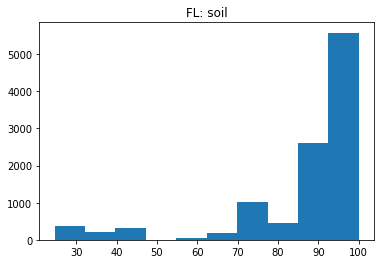

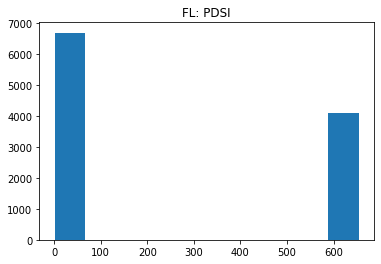

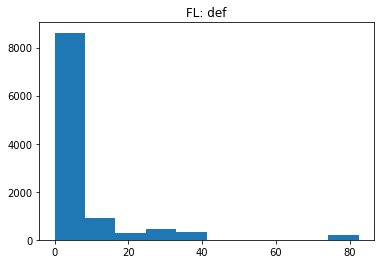

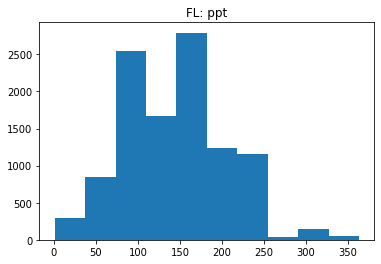

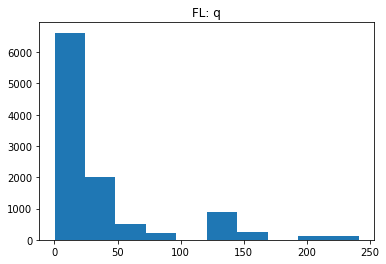

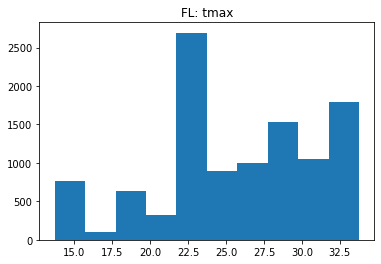

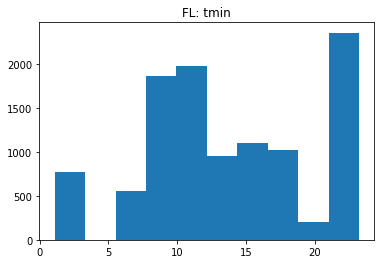

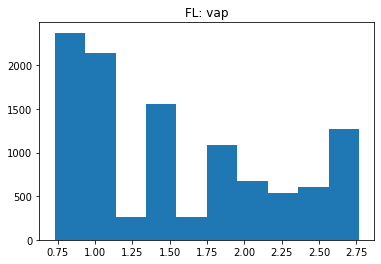

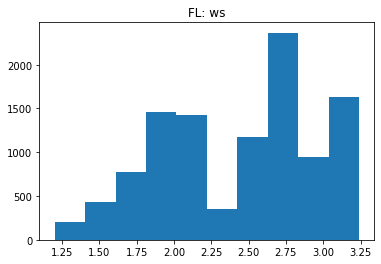

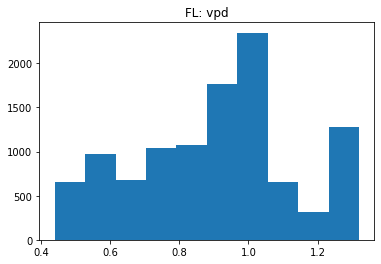

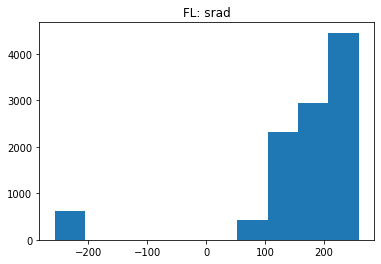

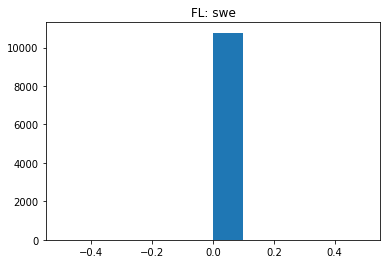

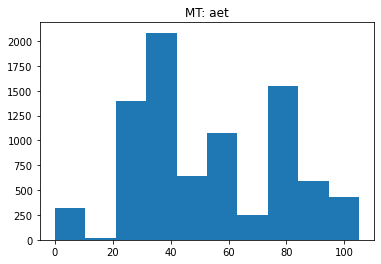

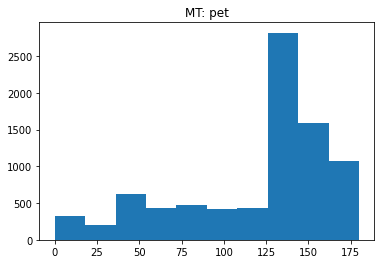

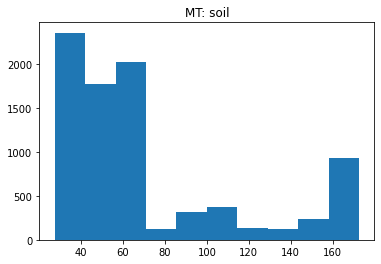

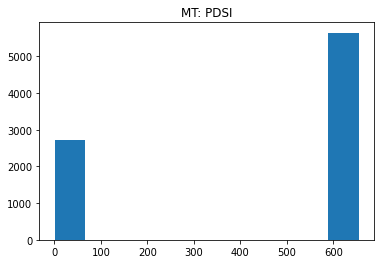

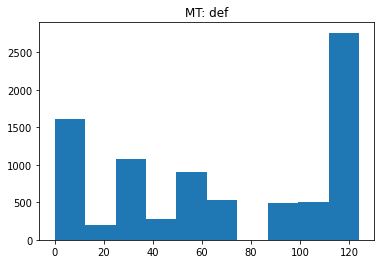

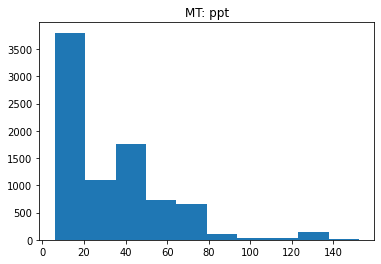

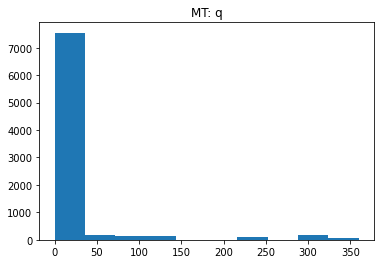

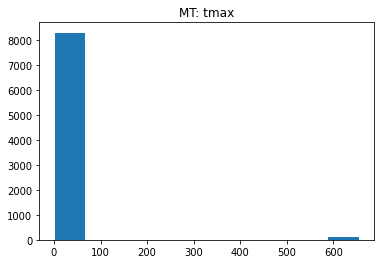

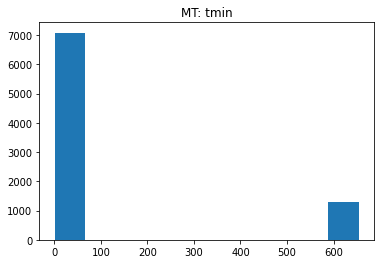

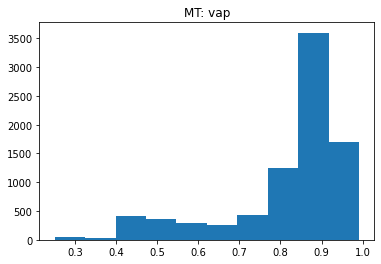

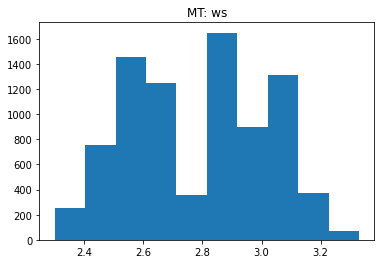

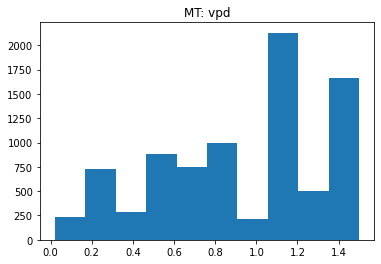

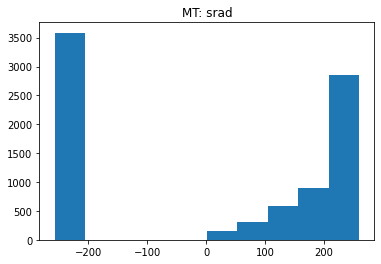

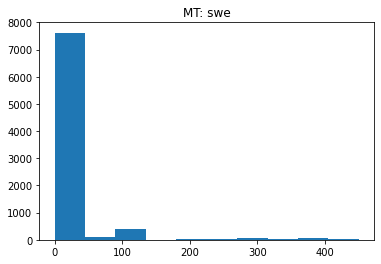

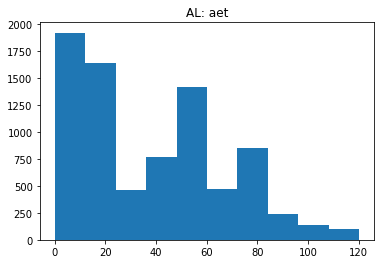

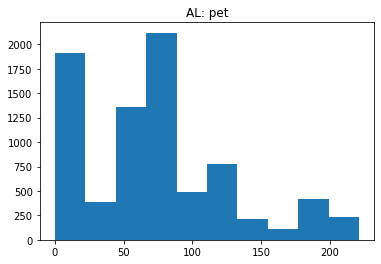

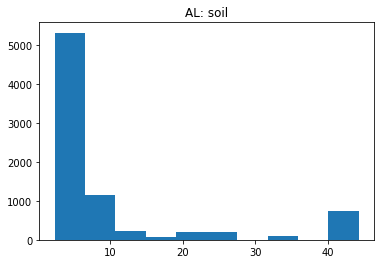

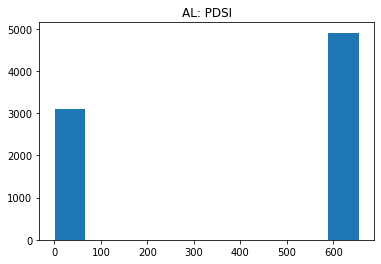

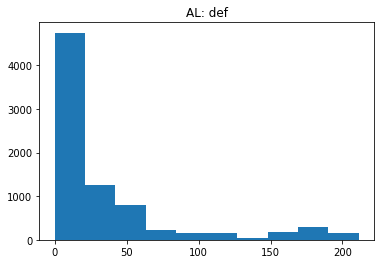

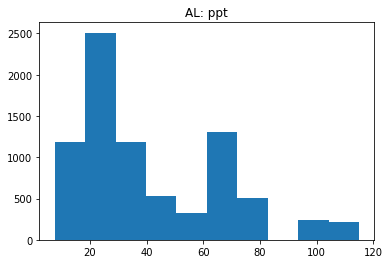

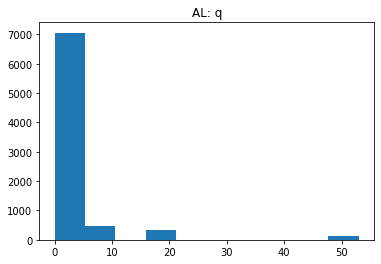

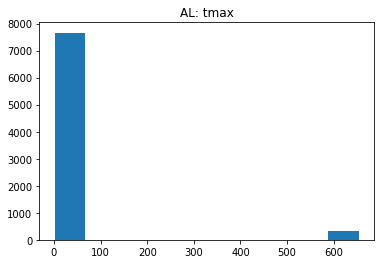

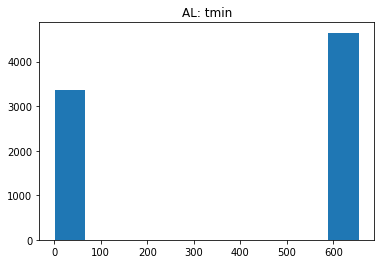

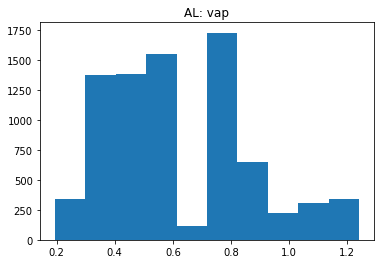

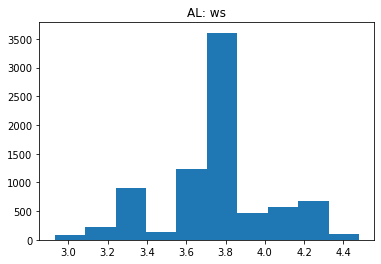

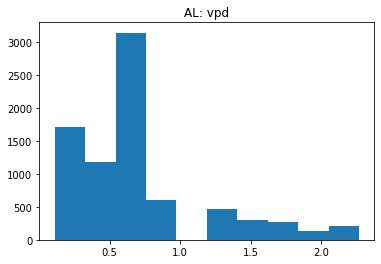

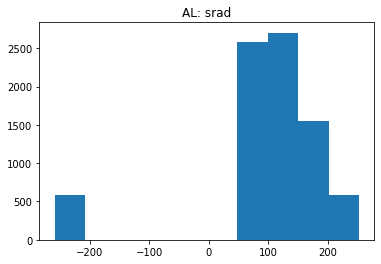

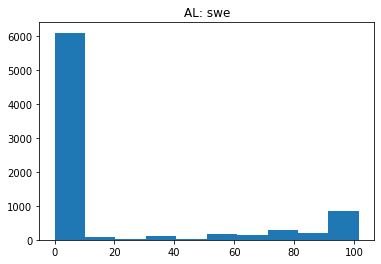

In [ ]:
for state in states:
  for i in range(len(weather)):
    plt.figure()
    plt.hist(Fires[Fires['STATE']==state][weather[i]])
    title = state + ': ' + weather[i]
    plt.title(title)
    plt.show()
    print()
  print('\n\n\n\n')

In [ ]:
TestByState = pd.DataFrame(columns=['state','weather var','difference', \
                                    'p-value','size'])

for i in range(len(weather)):
  for state in states:
    Big = Fires[(Fires['SmallBig']==1) & (Fires['STATE']==state)].copy()
    Small = Fires[(Fires['SmallBig']==0) & (Fires['STATE']==state)].copy()
    size = len(Big) + len(Small)
    result = ttest_ind(Big[weather[i]],Small[weather[i]])
    difference = result[0]
    p = result[1]
    row = {'state':state,'weather var':weather[i],'difference':difference,\
           'p-value':p,'size':size}
    row_df = pd.DataFrame([row],columns=row.keys())
    TestByState = TestByState.append(row_df)

TestByState

,state,weather var,difference,p-value,size
0,TX,aet,-10.364429,3.929837e-25,33345
0,AZ,aet,-9.023865,1.980197e-19,19526
0,CO,aet,-1.294688,1.954437e-01,18786
0,NY,aet,-3.177321,1.488907e-03,18193
0,KS,aet,-11.327453,1.250954e-29,15678
...,...,...,...,...,...
0,NC,swe,8.377002,5.905992e-17,14998
0,GA,swe,3.895903,9.829910e-05,13685
0,FL,swe,NaN,NaN,10770
0,MT,swe,-2.376932,1.747965e-02,8373


(array([118.,   4.,   3.,   4.,   2.,   1.,   1.,   3.,   1.,   1.]),
 array([0.        , 0.09757223, 0.19514445, 0.29271668, 0.3902889 ,
        0.48786113, 0.58543336, 0.68300558, 0.78057781, 0.87815004,
        0.97572226]),
 <a list of 10 Patch objects>)

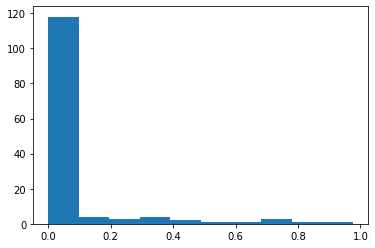

In [ ]:
plt.hist(TestByState['p-value'])

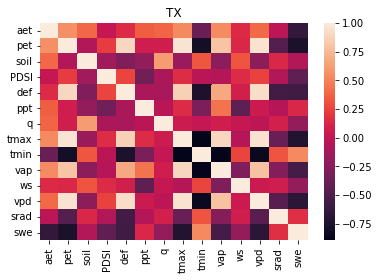

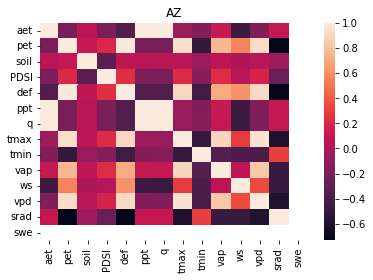

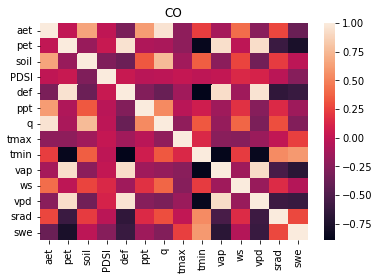

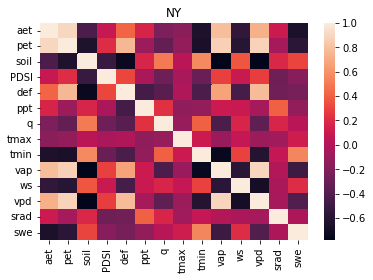

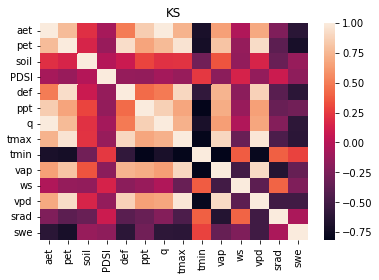

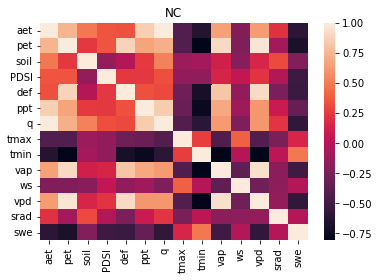

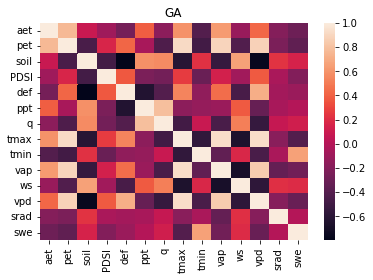

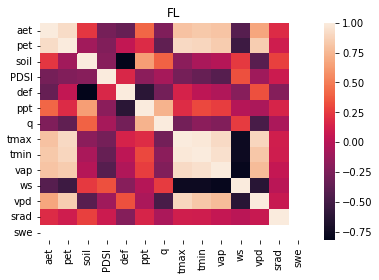

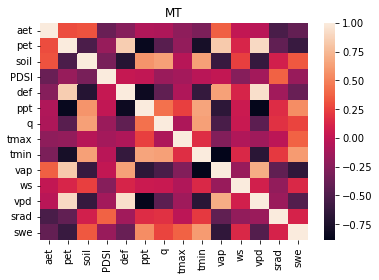

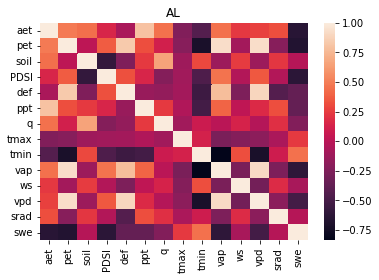

In [ ]:
for state in states:
  # plot corr
  plt.figure()
  sns.heatmap(Fires[Fires['STATE']==state][weather].corr())
  plt.title(state)
  plt.show()
  print()

# Probability of large wildfire for a given weather feature

In [ ]:
unique_aet = Fires['aet'].unique()
aet_prob = []

for aet in unique_aet:
  # calculate probability of large fire
  aet_prob.append(Fires[Fires['aet']==aet]['SmallBig'].value_counts(normalize=True).iloc[0])

In [ ]:
Fires[Fires['aet']==114.9]['SmallBig'].value_counts(normalize=True).iloc[0]

0.8260869565217391

(array([37., 25., 42., 37., 35., 55., 39., 28., 16., 32.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Patch objects>)

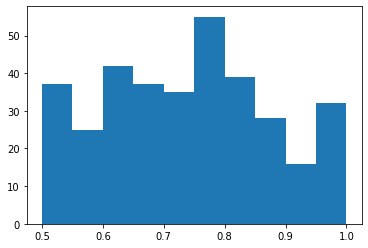

In [ ]:
plt.hist(aet_prob)

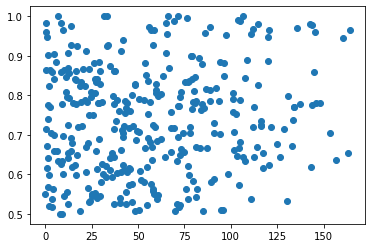

In [ ]:
plt.scatter(unique_aet,aet_prob)

In [ ]:
unique_soil = Fires['soil'].unique()
soil_prob = []

for soil in unique_soil:
  # calculate probability of large fire
  soil_prob.append(Fires[Fires['soil']==soil]['SmallBig'].value_counts(normalize=True).iloc[0])

(array([22., 24., 22., 21., 22., 26., 32., 22., 10., 14.]),
 array([0.5       , 0.54818182, 0.59636364, 0.64454545, 0.69272727,
        0.74090909, 0.78909091, 0.83727273, 0.88545455, 0.93363636,
        0.98181818]),
 <a list of 10 Patch objects>)

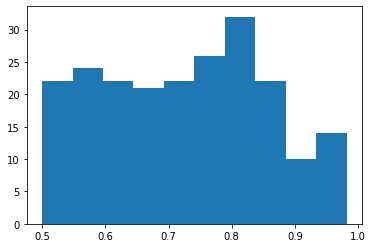

In [ ]:
plt.hist(soil_prob)

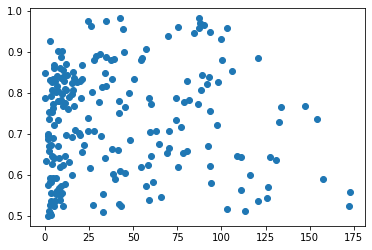

In [ ]:
plt.scatter(unique_soil,soil_prob)